## Title: The Importance of Preprocessing in a Machine Learning Pipeline
### Author: Andrea Giussani
#### Series in The Long Beard Blog - Nov 2020

### Introduction

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [2]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop(['MEDV'], axis=1)
y = boston['MEDV']

In [4]:
import seaborn as sns
df = boston
data_melted = pd.melt(df)

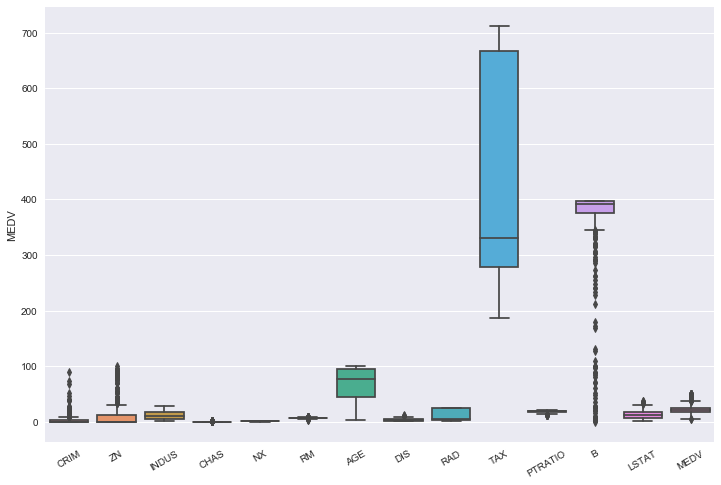

In [5]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(12,8)) 
    ax = sns.boxplot(x="variable", y="value", data=data_melted)
    ax.set_ylabel('MEDV')
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.show()

### Standard Scaler

In [6]:
scaler = StandardScaler()
scaler.fit(boston)
X_scaled = scaler.transform(boston)

In [7]:
X_scaled_df = pd.DataFrame(X_scaled, columns=list(boston))

In [8]:
X_scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


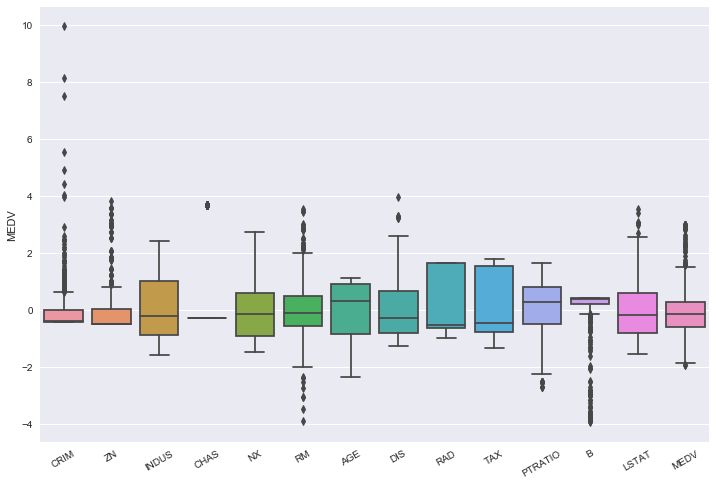

In [9]:
df = X_scaled_df
data_melted = pd.melt(df)
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(12,8)) 
    ax = sns.boxplot(x="variable", y="value", data=data_melted)
    ax.set_ylabel('MEDV')
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.show()

### Force data to be Gaussian

In [10]:
pt = PowerTransformer(method='yeo-johnson')
data_gauss = pt.fit_transform(X_scaled)


In [11]:
data_gauss_df = pd.DataFrame(data_gauss, columns=list(boston))

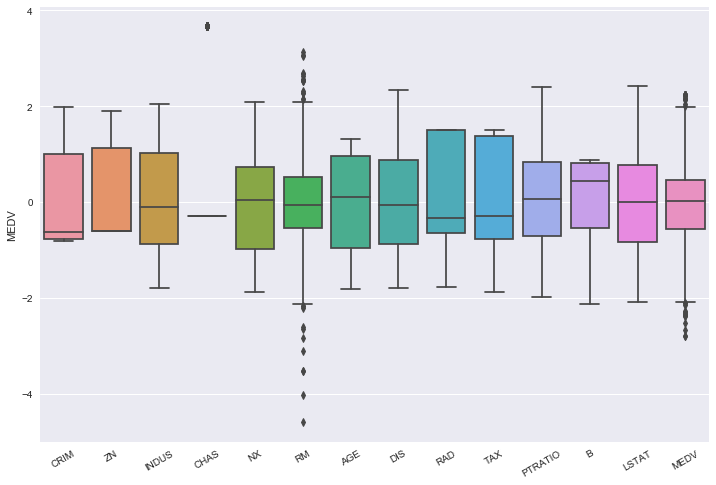

In [12]:
df = data_gauss_df
data_melted = pd.melt(df)
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(12,8)) 
    ax = sns.boxplot(x="variable", y="value", data=data_melted)
    ax.set_ylabel('MEDV')
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.show()

### Better Performances with the Feature Union Pipeline

In [13]:
from sklearn.pipeline import FeatureUnion

In [14]:
transformer = FeatureUnion(
    transformer_list=[
        ('scaler', StandardScaler()),
        ('pt', PowerTransformer(method='yeo-johnson')),
    ]
)
transformer = transformer.fit(boston)
results = transformer.transform(boston)

In [15]:
data_pipe_df = pd.DataFrame(results)

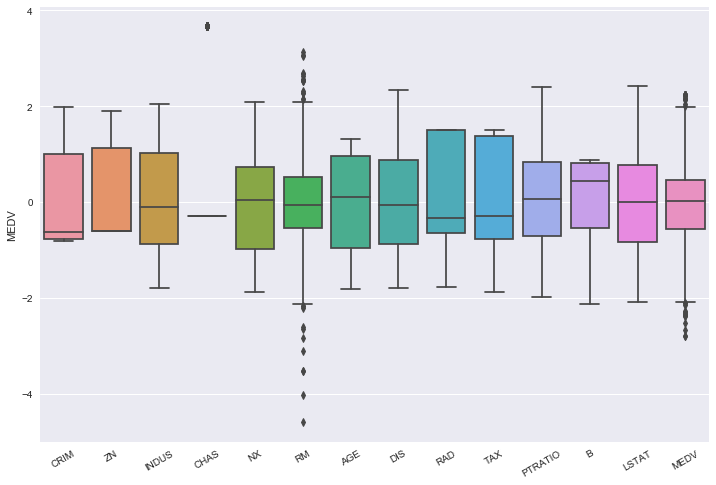

In [16]:
df = data_gauss_df
data_melted = pd.melt(df)
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(12,8)) 
    ax = sns.boxplot(x="variable", y="value", data=data_melted)
    ax.set_ylabel('MEDV')
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.show()